<a href="https://colab.research.google.com/github/andreasslien/machine_learning_group_40/blob/main/Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Correlation analysis

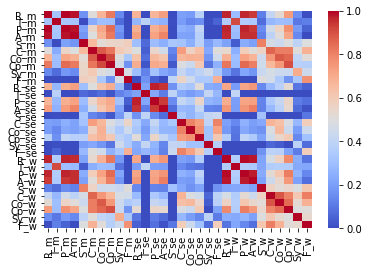

pairs:     first second      corr
0    R_m    P_m  0.997855
18   R_w    P_w  0.993708
1    R_m    A_m  0.987357
6    P_m    A_m  0.986507
19   R_w    A_w  0.984015
20   P_w    A_w  0.977578
15  R_se   P_se  0.972794
8    P_m    P_w  0.970387
2    R_m    R_w  0.969539
7    P_m    R_w  0.969476
3    R_m    P_w  0.965137
10   A_m    R_w  0.962746
12   A_m    A_w  0.959213
11   A_m    P_w  0.959120
16  R_se   A_se  0.951830
9    P_m    A_w  0.941550
4    R_m    A_w  0.941082
17  P_se   A_se  0.937655
13  Co_m   Cp_m  0.921391
5    T_m    T_w  0.912045
14  Cp_m   Cp_w  0.910155
Unique:  ['A_m' 'A_se' 'A_w' 'Co_m' 'Cp_m' 'Cp_w' 'P_m' 'P_se' 'P_w' 'R_m' 'R_se'
 'R_w' 'T_m' 'T_w']
Counted: 
A_m	[5]
A_w	[5]
P_m	[5]
P_w	[5]
R_m	[5]
R_w	[5]
A_se	[2]
Cp_m	[2]
P_se	[2]
R_se	[2]
Co_m	[1]
Cp_w	[1]
T_m	[1]
T_w	[1]

Sorted means for uniques:
A_w	[880.5831282952545]
A_m	[654.8891036906857]
P_w	[107.2612126537786]
P_m	[91.96903339191566]
A_se	[40.33707908611603]
T_w	[25.677223198594014]
T_m	[19.289648506

In [2]:
# Imported libraries
import seaborn as sns
import pprint as pp
import json
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Dataset
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
    header=None)

#Label Features
dfc = [
    "ID", "Diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean", "concave.points_mean",
    "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
    "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave.points_se",
    "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
    "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave.points_worst",
    "symmetry_worst", "fractal_dimension_worst"]

#Label Features w/short notation
dfc = [
    "ID", "Diagnosis",
    "R_m", "T_m", "P_m", "A_m", "S_m", "C_m", "Co_m", "Cp_m", "Sy_m", "F_m",
    "R_se", "T_se", "P_se", "A_se", "S_se", "C_se", "Co_se", "Cp_se", "Sy_se", "F_se",
    "R_w", "T_w", "P_w", "A_w", "S_w", "C_w", "Co_w", "Cp_w", "Sy_w", "F_w"]

df.columns = dfc

#Drop Diagnosis and redundnat ID column and update labels.
df = df.drop(['Diagnosis','ID'], axis=1)
dfc = list(df.columns)

#Print data for check
#print(df.head())
#print(dfc)

#Print heatmap w/correlations, shown as figure 4 in paper.
heatmap = sns.heatmap(df.corr(), vmax=1.0, vmin=0, cmap='coolwarm', xticklabels=True, yticklabels=True)
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig("corr_large.png")
plt.rcParams["figure.figsize"] = (40,60)
plt.show()

#Extract relevant values into variables.
row, col = df.shape
corr = df.corr().values

#Create dictionary w/mean for each feature and sort this descending by mean.
means = {}
for c in range(col):
    means[dfc[c]] = []
    means[dfc[c]].append(df[dfc[c]].mean(axis=0))

means = {k: v for k, v in sorted(means.items(), key=lambda item: item[1], reverse=True)}
#print('Sorted means:')
#print("\n".join("{}\t{}".format(k, v) for k, v in means.items()))

#remove_r = []
#remove_c = []

#Identify pairs with strong correlation as set in var strong_threshold, 0.90 or 0.95.
strong_threshold = 0.90
pairs = []
for r in range(row):
    for c in range(r+1, col):
        if (corr[r,c] > strong_threshold):
            pairs.append([dfc[r], dfc[c], corr[r,c]])
            '''
            print('lowest mean in each pair: ')
            if(df[dfc[r]].mean(axis=0) < df[dfc[c]].mean(axis=0)):
                print(dfc[r], ' ', df[dfc[r]].mean(axis=0))
                remove_r.append(dfc[r])
            else:
                print(dfc[c], ' ', df[dfc[c]].mean(axis=0))
                remove_c.append(dfc[c])
            '''

#Print all pairs and their correlation value sorted by correlation descending.
pairs_df = pd.DataFrame(pairs)
pairs_df.columns = ['first', 'second', 'corr']
print("pairs: ", pairs_df.sort_values('corr', ascending=False))
#print("pairs: ", pairs_df)

#Extract the set of unique features participating in the strongly correlated pairs list
col_val = pairs_df[['first', 'second']].values
uniques = np.unique(col_val)
print('Unique: ', uniques)
counted = {}

#Count occurences for each unique relevant feature, i.e. each degree per feature-node.
for u in uniques:
    count = 0
    for v in col_val:
        for val in v:
            if (u==val):
                count += 1
    #print(u, '|', count)
    counted[u] = []
    counted[u].append(count)

#Print the uniques with their degree sorted descending.
counted = {k: v for k, v in sorted(counted.items(), key=lambda item: item[1], reverse=True)}
print('Counted: ')
print("\n".join("{}\t{}".format(k, v) for k, v in counted.items()))

#Extract the mean of all uniques for use when to nodes have equal degreee while conducting MDG.
m_key = means.keys()
del_list = []
for k in m_key:
    if (k not in uniques):
        del_list.append(k)

for i in del_list:
    means.pop(i)

print('\nSorted means for uniques:')
print("\n".join("{}\t{}".format(k, v) for k, v in means.items()))

print("Done | Further Analysis w/Graph and MDG algorithm conducted manually on the basis of provided prints.")
print("Information used for this is each pair with strong correaltion, and their means in order to be able to decide when there is a draw in degree.")
print("Run the script again with 'strong_threshold = 0.95' to get the pairs with even stronger correlation.")
print("See paper, section 2.2 and Figure 5 for further details of the approach and it's results.")
print("MDG was conducted by hand due to the fact that there were only 14 relevant features involved, thus rather quickly to do by hand. The list of degrees printet could also act as confirmation of correction graph drawing in initial state.")